# Monty Hall problem

In [1]:
nrun <- 10000 #how many times to run sim
n_door_start = 3 #how many doors do we have to begin with

Set up your base variables.  (These will change later in the notebook, and/or you can change them on your own.)  nrun is how many times we're going to run a simulation of the Monty Hall Game, and n_door_start is the number of doors we start with -- which will default to 3 as in the original problem.

So, we are going to run 1000 Monty Hall Games with 3 (the standard number of) doors.  In each game one door has a prize, two doors have goats.  (Which is also a prize if you live on a farm... I guess... but anyways)

In [2]:
montyhallfx <- function(n_door_start = 3){#how many doors to start w/ - default 3
  
  door_vector <- vector(length=n_door_start)
  door_vector[1] <- TRUE #create a 'winning' door, place it in slot 1 for convenience
  door_vector <- sample(door_vector) #shuffle doors around randomly
  
  door_pick <- sample(length(door_vector),1) #pick a position for your door choice
  
  false_doors <- which(!door_vector)#identify the false doors' locations
  
  true_door <- which(door_vector)
  
  is_original_pick_correct <- door_pick==true_door
  
  is_switch_pick_correct <- door_pick!=true_door
  
  #return door pick answer (T or F) and switch pick answer (T or F) as named DT row
  return(cbind(is_original_pick_correct,is_switch_pick_correct))
}

This is the function we will use to run each instance of the Monty Hall game.  Its only argument is how many doors there are (notice that it defaults to 3 -- that is to say, we did not need to specify the number of doors at 3 in the beginning.  We only need to specify the number of doors if we change it.  But first, let's go with the original problem.)

In [3]:
#create answer DT for n runs
df <- data.frame("original_pick_correct"=vector(length=nrun),"switching_is_correct"=vector(length=nrun))

Before running the games, we set up a data frame to hold all of the simulations.  A data frame is like a table, or a matrix with named columns.  This one will have as many rows as there are runs of the simulation, and will display two binary values: in the left column, whether the original selected door was correct, and in the right, whether switching would get you the right door.  (The only reason to display both of these values is to show that they are perfectly opposite to each other.  If one is true, the other is false and vice versa.)

In [5]:
#run n timess
for(i in 1:nrun){
  df[i,] <- rbind(montyhallfx(n_door_start))
}

Now we set up a for loop (hush, R purists, it's more readable) and have it run the 'montyhallfx' function for a 3-door game, 1000 ('nrun') times, and save the outcomes in our data frame 'df' so that we can view them.  Let's view some of them:

In [6]:
head(df)

original_pick_correct,switching_is_correct
FALSE,TRUE
FALSE,TRUE
FALSE,TRUE
FALSE,TRUE
TRUE,FALSE
FALSE,TRUE


Cool!  So it looks like switching doors will lead you to the correct answer more often than staying with your original door.  Real quickly, let's just check and make sure that these two options are ALWAYS mutually exclusive (as they should be -- if they aren't, there's a bug in the program!  This is a very quick, very dirty test).

In [9]:
any(!which(df$original_pick_correct) == which(!df$switching_is_correct))

[1] FALSE

Great!  What that little bit up there just did was check and make sure that for each instance that the original picked door was the right one, the remaining door was NOT.  (ie, there is only one correct door in any game)  Then, of that big long list, it checked to see if anything in it was false (which would have happened if both the original pick and switched pick were correct, a potential bug).  Since there were no false results, this check returned FALSE, which is what we wanted!  Now let's make sure that there is one winning door in ALL the results in the simulation (because another potential bug would be to have neither door correct, which would mean the virtual game show host is cheating!)

In [14]:
nrun==length(which(df$original_pick_correct) == which(!df$switching_is_correct)) + length(which(!df$original_pick_correct) == which(df$switching_is_correct))

[1] TRUE

Neat!  Now that we've got that out of the way, let's look at the actual results.

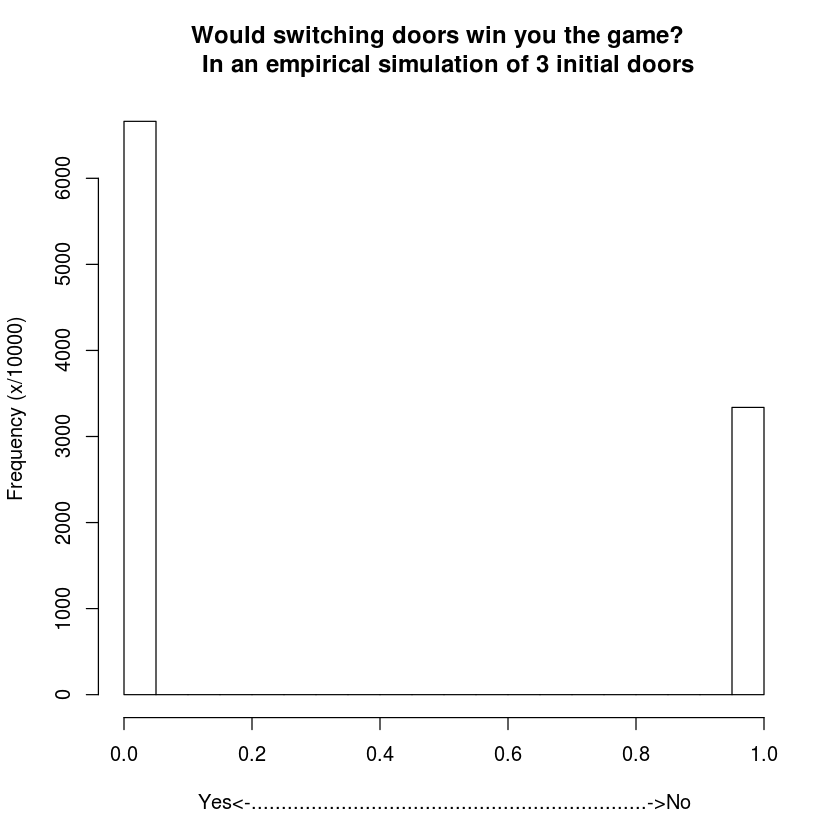

In [17]:
hist(as.numeric(df[,1]),main=paste0("Would switching doors win you the game?  \n In an empirical simulation of ",n_door_start," initial doors"),
     xlab='Yes<-..................................................................->No',
ylab=paste0('Frequency (x/',nrun,')'))

Hmm at a glance, looks like switching doors would win about 2/3 of the time, not half!  This is in support of the mathematicians' assertion, although it's against some of our intuition.  But let's look at the actual numbers now:

In [24]:
expected_odds_original <- 1/n_door_start #the expected odds of the original door being right
outcome_original <- length(which(df$original_pick_correct))/nrun

print(paste("Expected odds of original door winning:",expected_odds_original))
print(paste("Experimental odds of original door winning:",outcome_original))

[1] "Expected odds of original door winning: 0.333333333333333"
[1] "Experimental odds of original door winning: 0.3338"


Seems pretty spot on to me!

Feel free to run the code blocks again, changing n_door_start (all the way up at the beginning) to, say, 100 (this setup assumes the host will leave you with only two doors), or making nruns so low that the corollary to the law of large numbers results in the experimental odds appearing to contradict the expected ones.

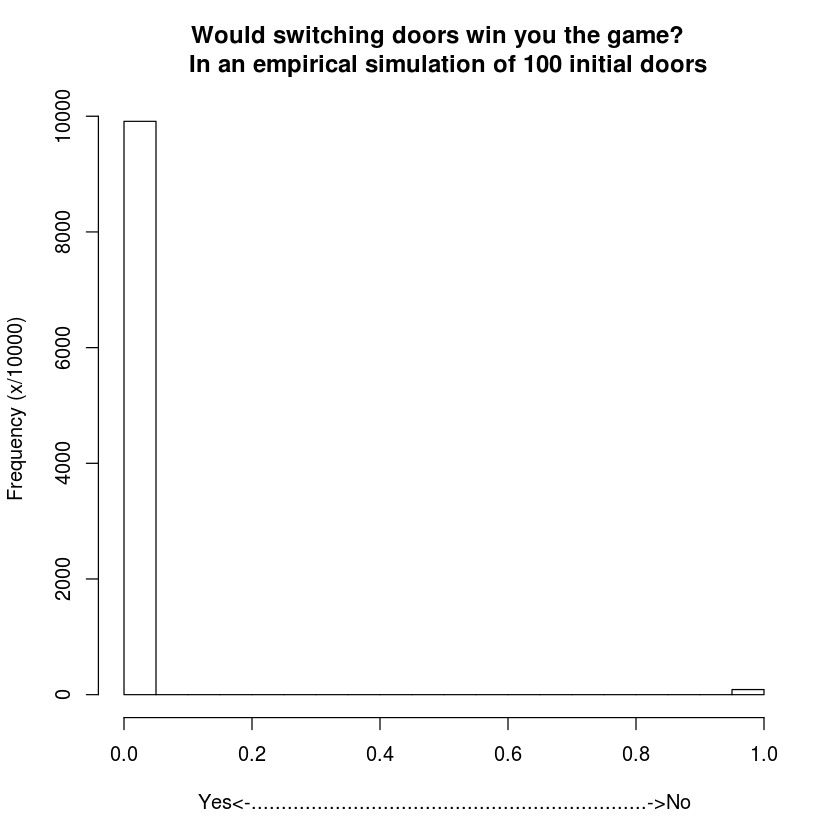

In [25]:
n_door_start <- 100

dt <- data.frame("original_pick_correct"=vector(length=nrun),
                 "switching_is_correct"=vector(length=nrun))

#run n timess
for(i in 1:nrun){
  dt[i,] <- rbind(montyhallfx(n_door_start))
}

hist(as.numeric(dt[,1]),main=paste0("Would switching doors win you the game?  \n In an empirical simulation of ",n_door_start," initial doors"),
     xlab='Yes<-..................................................................->No',
ylab=paste0('Frequency (x/',nrun,')'))